## Implementation

In [1]:
from IOHMM import IOHMM_model
import numpy as np, pandas as pd
import torch
import matplotlib.pyplot as plt

torch.manual_seed(3)

In [2]:
data = pd.read_csv("data/Financial-Data/stocks/TSLA.csv")
data.head()
data = data.dropna()
print(len(data))

input = torch.tensor(np.array(data[['Open']]), dtype=torch.float32)
output = torch.tensor(np.array(data['Close']), dtype=torch.float32)

3260


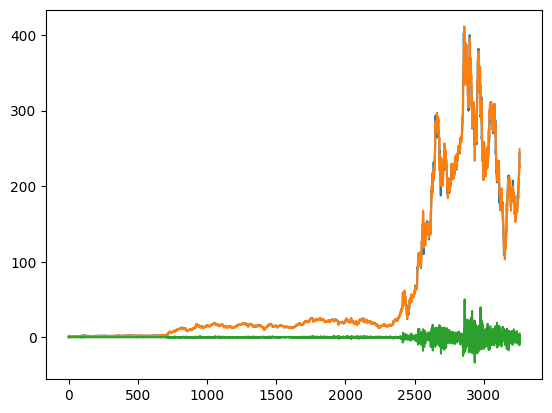

In [3]:
plt.plot(output)
plt.plot(input)

a = data['Open'] - data['Close']
plt.plot(a)

# Example 1

## Set up a simple model manully

In [4]:
# taking points from 1500 to the end because they are more interesting
IOHMM = IOHMM_model(num_states=2, inputs=input[:2000], outputs=output[:2000], max_iter=1000, tol=1e-6)
print(IOHMM.initial_pi)
print(IOHMM.transition_matrix)
print(IOHMM.emission_matrix)
print(IOHMM.sd)

Parameter containing:
tensor([0.5000, 0.5000], requires_grad=True)
Parameter containing:
tensor([[[ 0.8033,  0.1748],
         [ 0.0890, -0.6137]],

        [[ 0.0462, -1.3683],
         [ 0.3375,  1.0111]]], requires_grad=True)
Parameter containing:
tensor([[-1.4352,  0.9774],
        [ 0.5220,  1.2379]], requires_grad=True)
Parameter containing:
tensor([1., 1.], requires_grad=True)


In [5]:
print(IOHMM._forward())
torch.sum(IOHMM._forward(), dim=1)

tensor([[1.8574e-01, 8.1426e-01],
        [1.3133e-01, 8.6867e-01],
        [1.0958e-01, 8.9042e-01],
        ...,
        [1.0000e+00, 2.1683e-14],
        [1.0000e+00, 2.9998e-09],
        [1.0000e+00, 4.3383e-14]])


tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [6]:
print(IOHMM._backward())
torch.sum(IOHMM._backward(), dim=1)

tensor([[1.7549e-02, 9.8245e-01],
        [4.5855e-02, 9.5414e-01],
        [5.8041e-02, 9.4196e-01],
        ...,
        [1.0000e+00, 3.8909e-14],
        [1.0000e+00, 6.2108e-08],
        [1.0000e+00, 1.3294e-06]])


tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])

In [7]:
print(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()))
torch.sum(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()), dim=1)

tensor([[4.0582e-03, 9.9594e-01],
        [7.2131e-03, 9.9279e-01],
        [7.5259e-03, 9.9247e-01],
        ...,
        [1.0000e+00, 8.4366e-28],
        [1.0000e+00, 1.8632e-16],
        [1.0000e+00, 5.7673e-20]])


tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [8]:
print(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()))
a = torch.sum(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()), axis=1)
torch.sum(a, axis=1)

tensor([[[9.0142e-02, 1.6337e-16],
         [9.0986e-01, 2.4925e-13]],

        [[9.5107e-03, 5.7955e-04],
         [2.4970e-02, 9.6494e-01]],

        [[8.1293e-03, 8.4987e-04],
         [1.7352e-02, 9.7367e-01]],

        ...,

        [[1.0000e+00, 5.5135e-33],
         [3.0414e-21, 9.2585e-26]],

        [[1.0000e+00, 3.2223e-35],
         [4.1903e-15, 1.3467e-21]],

        [[1.0000e+00, 3.7241e-31],
         [3.9395e-14, 3.9879e-15]]])


tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [9]:
IOHMM._log_likelihood(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()), IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()))

tensor(-4351.6968, grad_fn=<AddBackward0>)

In [10]:
IOHMM._baum_welch()

1 -4341.60205078125
2 -4334.689453125
3 -4334.67431640625
convergence reached :)


## See the training results

In [11]:
print("Initial pi")
print(IOHMM.initial_pi) # to normalize
print("Transition matrix")
print(IOHMM.transition_matrix)
print("Emission matrix")
print(IOHMM.emission_matrix)
print("Sd")
print(IOHMM.sd)

Initial pi
Parameter containing:
tensor([  274763.8750, 10331475.0000], requires_grad=True)
Transition matrix
Parameter containing:
tensor([[[ 0.8033,  0.1748],
         [ 0.0890, -0.6137]],

        [[ 0.0462, -1.3683],
         [ 0.3375,  1.0111]]], requires_grad=True)
Emission matrix
Parameter containing:
tensor([[-1.4352,  0.9774],
        [ 0.5220,  1.2379]], requires_grad=True)
Sd
Parameter containing:
tensor([1., 1.], requires_grad=True)


## Viterbi

In [12]:
path = IOHMM.viterbi()
print(path)
path[path==0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

0